In [1]:
# Import libraries 
import numpy as np 
import pandas as pd
import pandas_datareader.data as web 
import datetime
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [23]:
# Select time frame 
start = datetime.datetime(2013,5,1)
end = datetime.datetime(2022,5,1)

In [24]:
# Import data
Amazon = web.DataReader('AMZN','yahoo',start,end)
Apple = web.DataReader('AAPL','yahoo',start,end)
Meta = web.DataReader('META','yahoo',start,end)
Netflix = web.DataReader('NFLX','yahoo',start,end)
Tesla = web.DataReader('TSLA','yahoo',start,end)
sp500 = web.DataReader('^GSPC','yahoo',start,end)

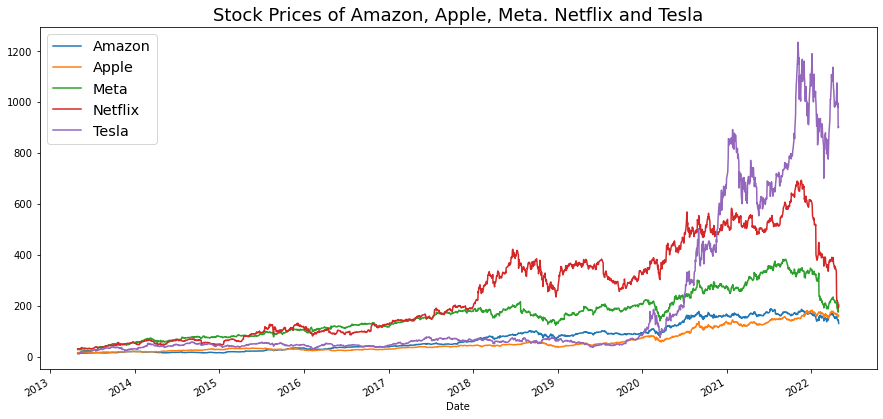

In [36]:
# Visualize Stock Prices of Amazon, Apple, Meta, Netflix and Tesla 
Amazon['Open'].plot(figsize=(15,7),label='Amazon')
Apple['Open'].plot(label='Apple')
Meta['Open'].plot(label='Meta')
Netflix['Open'].plot(label='Netflix')
Tesla['Open'].plot(label='Tesla')
plt.title('Stock Prices of Amazon, Apple, Meta. Netflix and Tesla',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

<b>- From 2013-2022 the price of all stocks go up. 
    
<b>- Especially Tesla's stock grew strongly from 2020 to the present. 
    
<b>- The stock of Meta and Netflix go down from the end of 2021 until now. 
    
<b>- The volatality of Amazon and Apple's stock is small.<b>

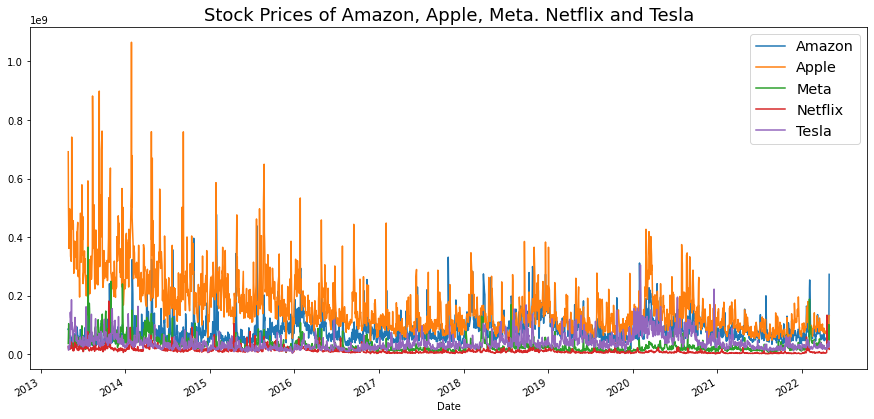

In [39]:
# Visualize Volume of Amazon, Apple, Meta, Netflix and Tesla 
Amazon['Volume'].plot(figsize=(15,7),label='Amazon')
Apple['Volume'].plot(label='Apple')
Meta['Volume'].plot(label='Meta')
Netflix['Volume'].plot(label='Netflix')
Tesla['Volume'].plot(label='Tesla')
plt.title('Volume of Amazon, Apple, Meta, Netflix and Tesla',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

<b>The volume of Apple's stock dominated the market from 2013 to 2017.<b>

In [40]:
# Calculate Total Traded 
Amazon['Total Traded'] = Amazon['Open'] * Amazon['Volume']
Apple['Total Traded'] = Apple['Open'] * Apple['Volume']
Meta['Total Traded'] = Meta['Open'] * Meta['Volume']
Netflix['Total Traded'] = Netflix['Open'] * Netflix['Volume']
Tesla['Total Traded'] = Tesla['Open'] * Tesla['Volume']

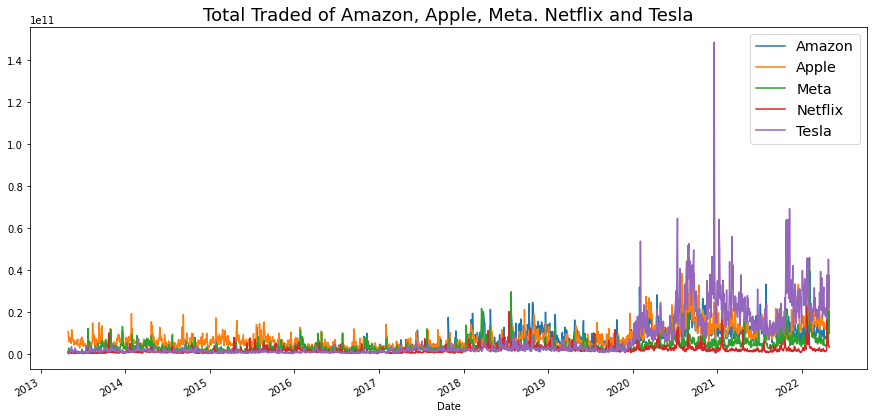

In [41]:
# Visualize Volume of Amazon, Apple, Meta, Netflix and Tesla 
Amazon['Total Traded'].plot(figsize=(15,7),label='Amazon')
Apple['Total Traded'].plot(label='Apple')
Meta['Total Traded'].plot(label='Meta')
Netflix['Total Traded'].plot(label='Netflix')
justdoit123

Tesla['Total Traded'].plot(label='Tesla')
plt.title('Total Traded of Amazon, Apple, Meta. Netflix and Tesla',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

<b>The total traded money for Tesla's stock increased strongly from 2020 to 2022 especially in the begining of 2021.<b>

In [46]:
Tesla.iloc[[Tesla['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded
Date,,,,,,,
2020-12-18,695.0,628.539978,668.900024,695.0,222126200.0,695.0,1.485802e+11


### Moving Average 

In [47]:
# Calculate Moving Average
Amazon['MA50'] = Amazon['Open'].rolling(50).mean()
Apple['MA50'] = Apple['Open'].rolling(50).mean()
Meta['MA50'] = Meta['Open'].rolling(50).mean()
Netflix['MA50'] = Netflix['Open'].rolling(50).mean()
Tesla['MA50'] = Tesla['Open'].rolling(50).mean()

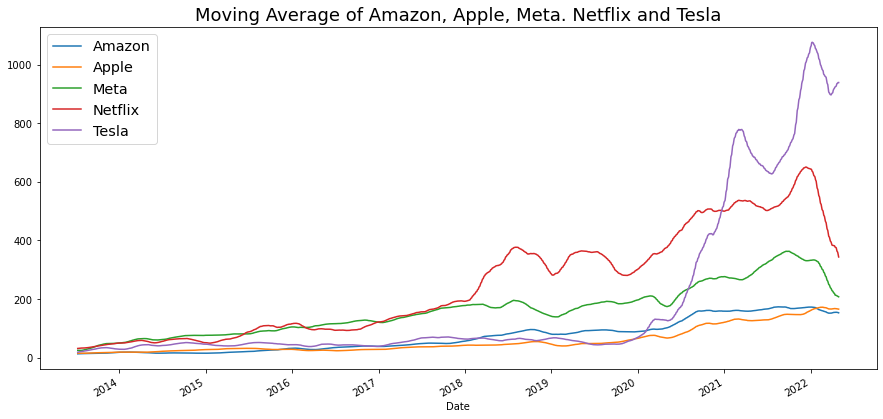

In [49]:
# Visualize Moving Average of Amazon, Apple, Meta, Netflix and Tesla 
Amazon['MA50'].plot(figsize=(15,7),label='Amazon')
Apple['MA50'].plot(label='Apple')
Meta['MA50'].plot(label='Meta')
Netflix['MA50'].plot(label='Netflix')
Tesla['MA50'].plot(label='Tesla')
plt.title('Moving Average of Amazon, Apple, Meta. Netflix and Tesla',fontsize=18)
plt.legend(fontsize='x-large')
plt.show()

In [56]:
stock1= pd.concat([Amazon['Open'], Apple['Open'], Meta['Open'], Netflix['Open'], Tesla['Open']], axis=1)
stock1.columns = ['Amazon Open', 'Apple Open', 'Meta Open', 'Netflix Open', 'Tesla Open']

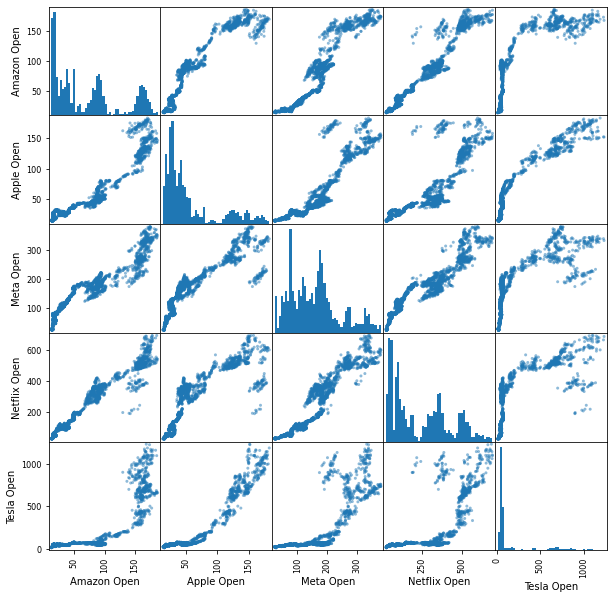

In [57]:
# Scatter matrix plot 
sm = pd.plotting.scatter_matrix(stock1, figsize=(10,10),hist_kwds={'bins':50})

### Daily Return

In [52]:
# Calculate Daily Return 
Amazon['returns'] = (Amazon['Close'] / Amazon['Close'].shift(1)) - 1
Apple['returns'] = (Apple['Close'] / Apple['Close'].shift(1)) - 1
Meta['returns'] = (Meta['Close'] / Meta['Close'].shift(1)) - 1
Netflix['returns'] = (Netflix['Close'] / Netflix['Close'].shift(1)) - 1
Tesla['returns'] = (Tesla['Close'] / Tesla['Close'].shift(1)) - 1

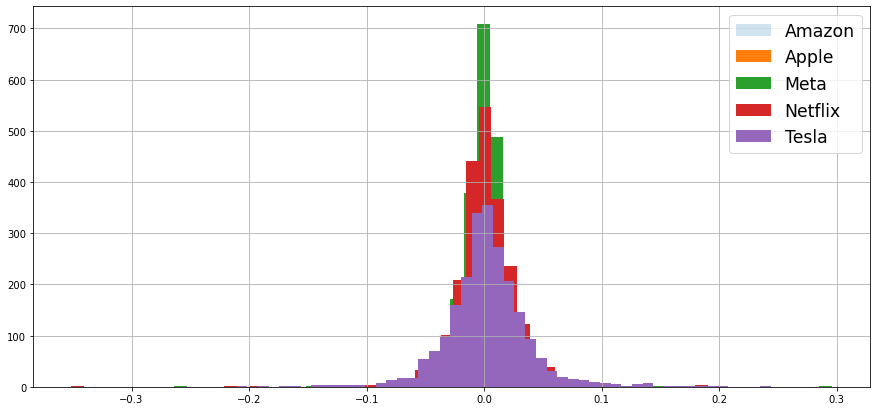

In [55]:
# Visualize Daily Return of Amazon, Apple, Meta, Netflix and Tesla
Amazon['returns'].hist(bins=50, label='Amazon',alpha=0.2,figsize=(15,7))
Apple['returns'].hist(bins=50,label='Apple')
Meta['returns'].hist(bins=50,label='Meta')
Netflix['returns'].hist(bins=50,label='Netflix')
Tesla['returns'].hist(bins=50,label='Tesla')
plt.legend(fontsize='xx-large')

<AxesSubplot:>

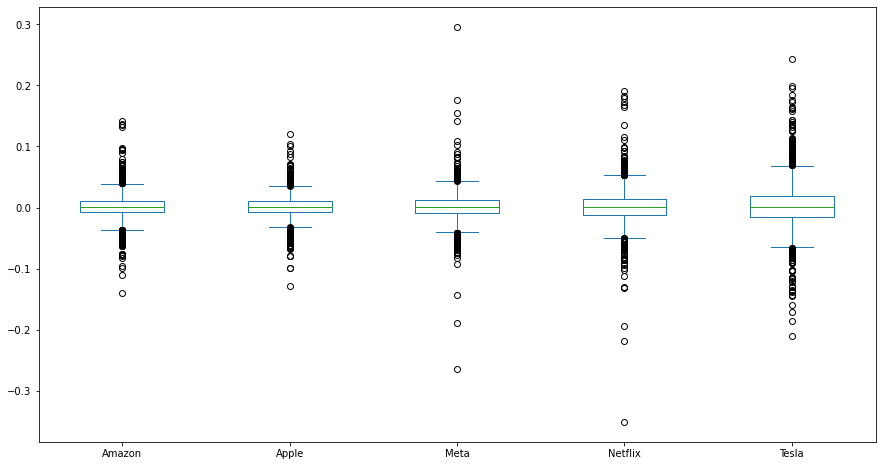

In [58]:
stock2= pd.concat([Amazon['returns'], Apple['returns'], Meta['returns'], Netflix['returns'], Tesla['returns']], axis=1)
stock2.columns = ['Amazon', 'Apple', 'Meta', 'Netflix', 'Tesla']
stock2.plot(kind='box', figsize=(15,8))

<b>Accoriding to these charts, we see that the volatility of Tesla, Netflix and Meta's stock are higher than other stocks (especially from 2020 to now).<b>

### Cumulative Return 

In [59]:
# Calculate Cumulative Return 
Amazon['Cumulative Return'] = (1 + Amazon['returns']).cumprod()
Apple['Cumulative Return'] = (1 + Apple['returns']).cumprod()
Meta['Cumulative Return'] = (1 + Meta['returns']).cumprod()
Netflix['Cumulative Return'] = (1 + Netflix['returns']).cumprod()
Tesla['Cumulative Return'] = (1 + Tesla['returns']).cumprod()

In [74]:
# Visualize the Cumulative Return of stocks
fig = go.Figure()

fig.add_trace(go.Scatter(
    name = 'Amazon',
    x = Amazon.index,
    y = Amazon['Cumulative Return'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name = 'Apple',
    x = Apple.index,
    y = Apple['Cumulative Return'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name = 'Meta',
    x = Meta.index,
    y = Meta['Cumulative Return'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name = 'Netflix',
    x = Netflix.index,
    y = Netflix['Cumulative Return'],
    connectgaps = True
))

fig.add_trace(go.Scatter(
    name = 'Tesla',
    x = Tesla.index,
    y = Tesla['Cumulative Return'],
    connectgaps = True
))

fig.update_layout(title_text = 'Cumulative Return of Amazon, Apple, Meta, Netflix and Tesla',width = 1000, height = 500)
fig.update_xaxes(title_text = 'Year')
fig.update_yaxes(title_text = 'Cumulative Return')

fig.show()

If you invest  **1$** for all stocks (Amazon, Apple, Meta, Netflix and Tesla) in 2013. You definitely made profit. 
Especially you could make profit more than  **100**  times in the end of 2021 if you invest Tesla's stock in 2013. 